<a href="https://colab.research.google.com/github/Yislein/Distribuidos/blob/main/Push.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

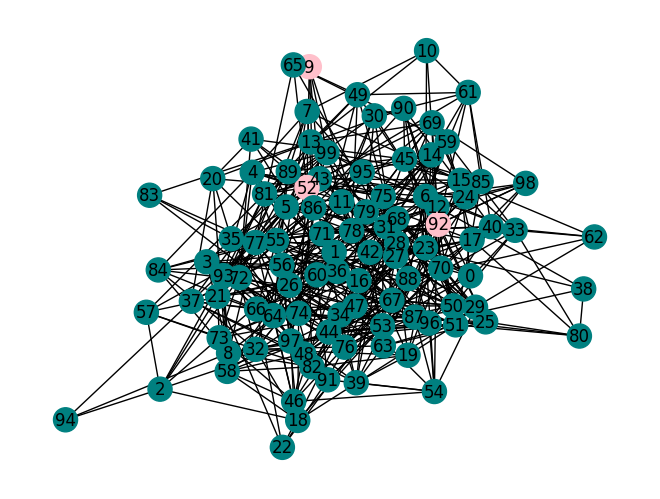

In [5]:
import networkx as nx
import matplotlib.pyplot as plt
import random

def simular_infeccion(num_nodos, nodo_infectado):
    # Creamos un grafo aleatorio utilizando el modelo de Erdős-Rényi
    G = nx.erdos_renyi_graph(num_nodos, 0.1)

    # Inicializamos el estado de cada nodo
    estados = {nodo: 'susceptible' for nodo in G.nodes()}
    estados[nodo_infectado] = 'infectado'

    # Lista de nodos infectados
    nodos_infectados = [nodo_infectado]

    # Mientras haya nodos infectados
    while nodos_infectados:
        # Seleccionamos un nodo infectado
        nodo_actual = nodos_infectados.pop(0)

        # Buscamos los vecinos susceptibles
        vecinos_susceptibles = [n for n in G.neighbors(nodo_actual) if estados[n] == 'susceptible']

        # Infectamos a los vecinos susceptibles con cierta probabilidad
        for vecino in vecinos_susceptibles:
            if random.random() < 0.3:  # Probabilidad de infección
                estados[vecino] = 'infectado'
                nodos_infectados.append(vecino)

    return estados

def dibujar_grafo(G, estados_nodos):
    # Colores para los nodos según su estado
    colores_nodos = ['teal' if estado == 'infectado' else 'pink' for estado in estados_nodos.values()]

    # Dibujamos el grafo
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_color=colores_nodos)
    plt.show()

if __name__ == "__main__":
    num_nodos = 100
    nodo_infectado = random.randint(0, num_nodos - 1)
    estados_nodos = simular_infeccion(num_nodos, nodo_infectado)
    grafo_aleatorio = nx.erdos_renyi_graph(num_nodos, 0.1)
    dibujar_grafo(grafo_aleatorio, estados_nodos)
